# DS3000 Final Project: Stock Prediction Model Comparison
## Team 21

- Jincheng Tian (tian.jinc@northeastern.edu)
- Mark Hurley (hurley.mar@northeastern.edu)
- Jacqueline Xuanzi Zhao (zhao.xua@northeastern.edu)
- Matthew Crowley (crowley.m@northeastern.edu)

#### Reuse Permissions

    The following may be re-used for any purposes:
    - all data included with submission
    - all images
    - this report and the notebooks which collected / cleaned the data
    - the associated [video presentation](todo:addlink)
    Please attribute any work to the authors listed above.


# Executive Summary
We built a program which compares stock prediction models of different time frequencies and Machine Learning tools. By collecting data from the Financial API provided by financialmodelingprep.com (https://financialmodelingprep.com/api/v3/) via an API key, we are able to gather yearly and daily historical stock prices as well as yearly financial ratios for any publicly traded company. Our program looks at the r2 scores for yearly and daily multiple regression models, as well as a daily model which uses a recurrent neural network. While the yearly model uses financial ratios to help determine stock price movement, the daily models simply use historical close prices. By comparing these models, we get a better sense of which model, based on the company, gives us the greatest r2 score and thus is the best model to use for predictive analysis (within the realm of our project). 


# Ethical Considerations
It should be understood that the purpose of the project is not to determine a definite, unequivocal solution to a problem but rather to provide an insightful alternative perspective which might aid those interested in pursuing success in the stock market.    


# Introduction
Being a good investor requires a strong combination of luck and skill. While there are many indicators of a company's financial wellbeing and future potential, such as financial ratios and other qualitative factors, it is very difficult to consistently accurately predict future stock price movement. We aim to simplify this process by providing information on what specific time frequencies of data and which Machine Learning tools they should focus on in order to make good investments.

The data we gather provides us with the necessary financial ratios as well as historical stock price data to allow us to draw connections between the two on different time frequencies, showing us which ML model is best fit for the given data. 


# Data Description

We are going to query an API to gather financial ratio data and historical stock price data on publicly traded companies.


We will use the Financial API on the Financial Modeling Prep website using this base URL:  https://financialmodelingprep.com/api/v3/. 

The [financial ratios](#ratios) we will be using are EBITDA, EPS, Current Ratio, Price-Earnings-To-Growth (PEG), Price-Earnings (P/E), Debt-To-Equity (D/E), and Price/Book Value.

First, we will get the historical price data to use as a baseline to evaluate the relationship betwen each ratio and the historical stock price.

The link we will be using is the first one that appears below.

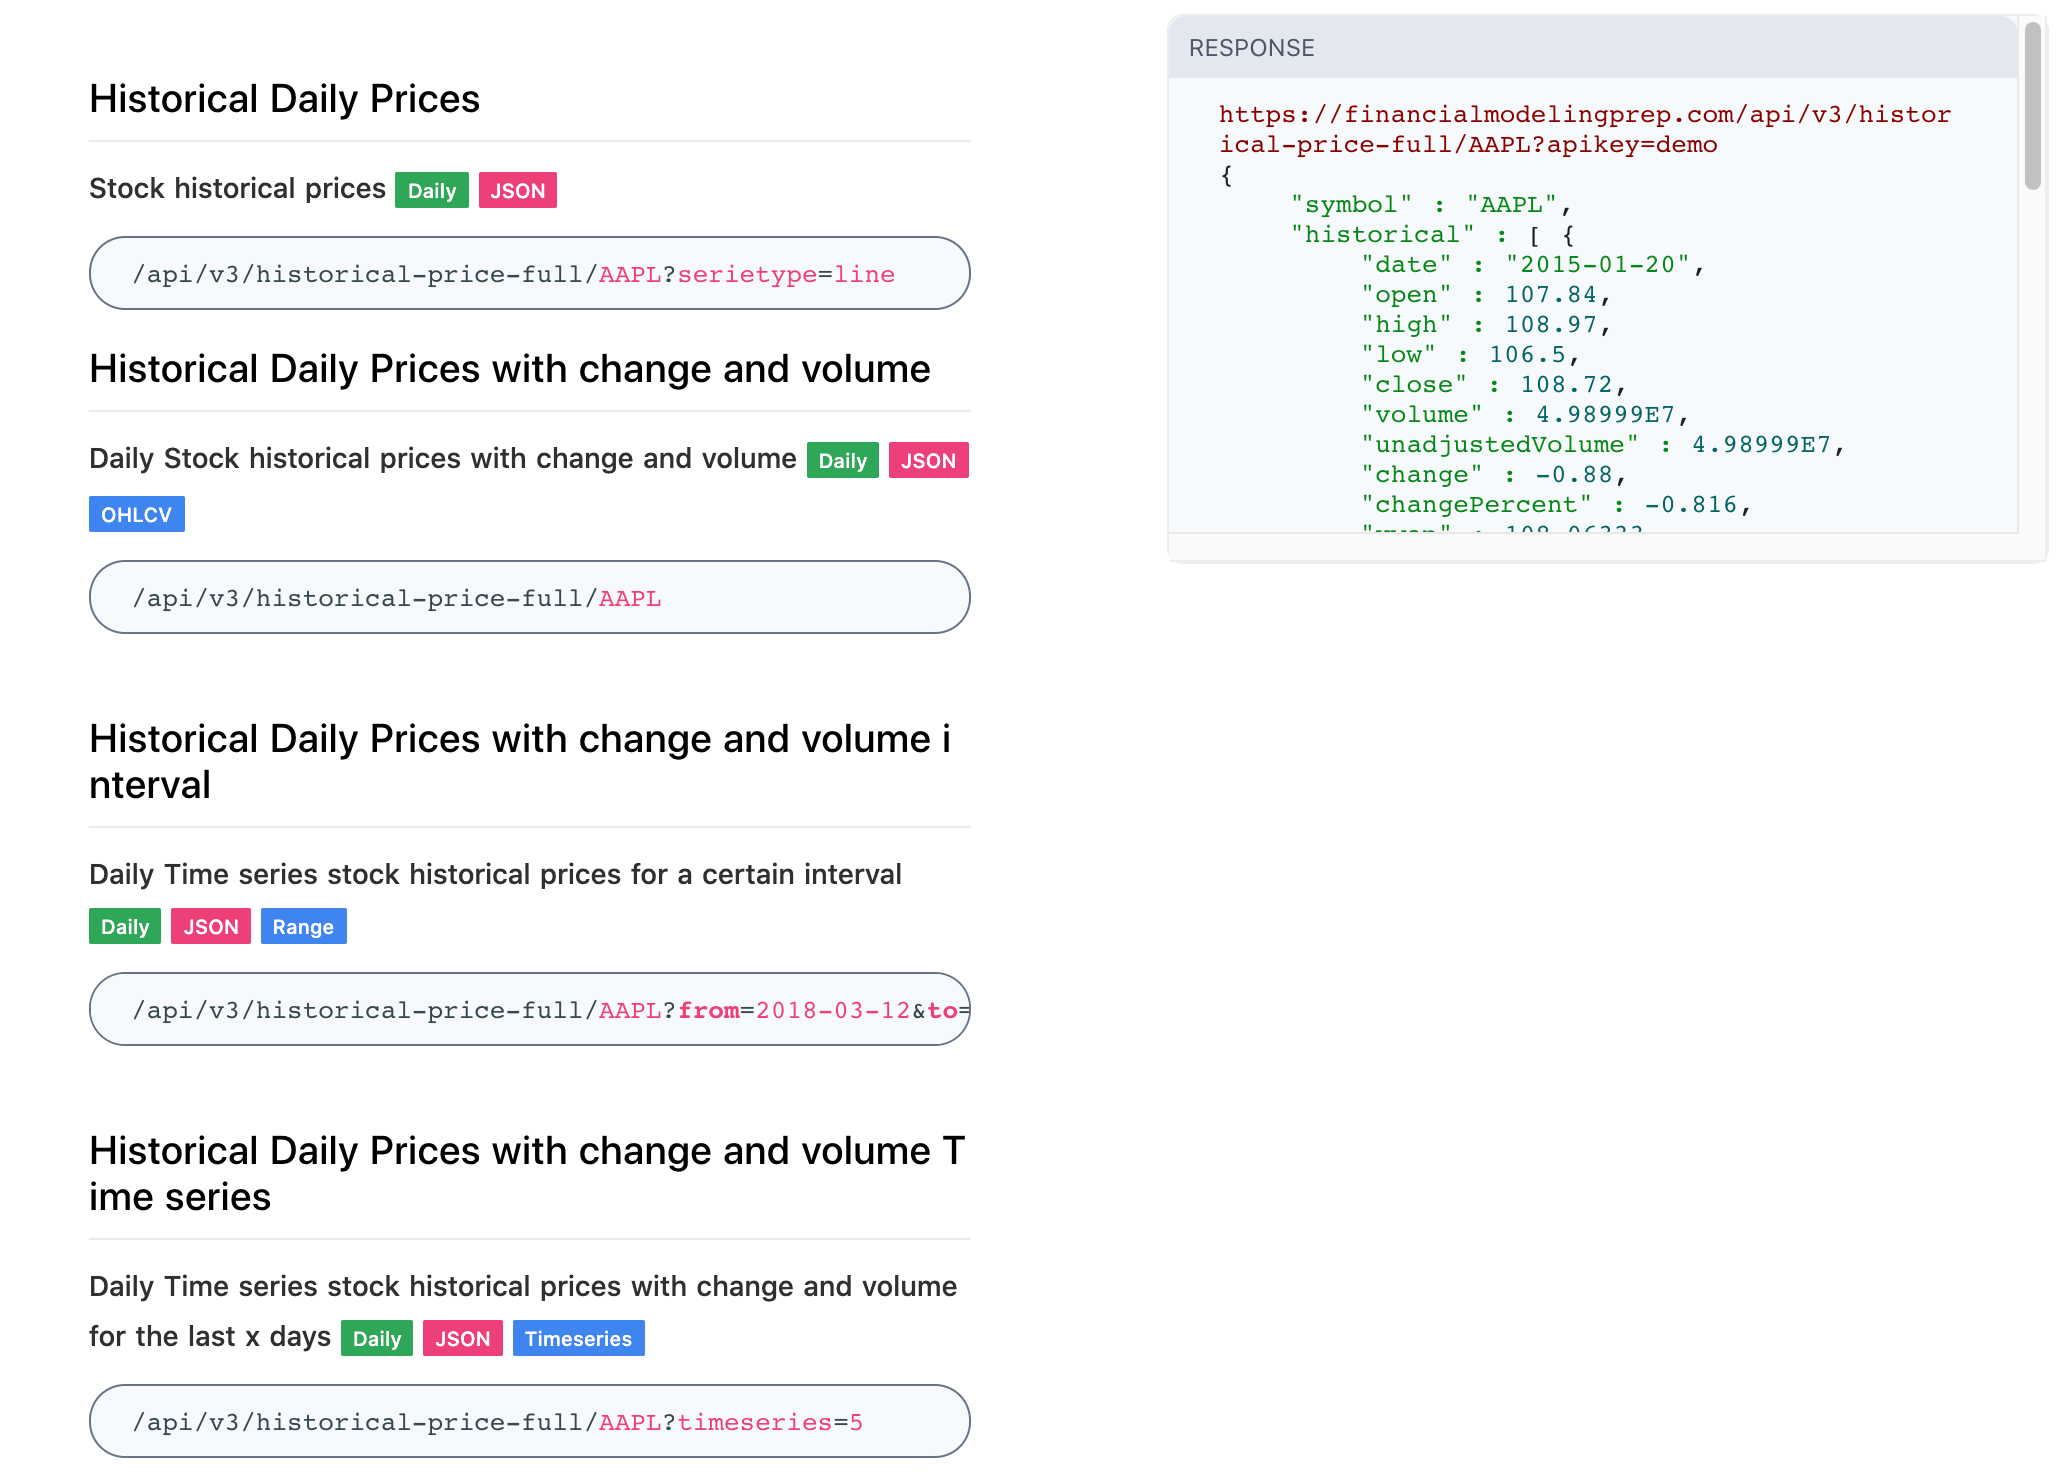

We will create a dataframe which contains the closing stock price given a ticker symbol, start, and end date.

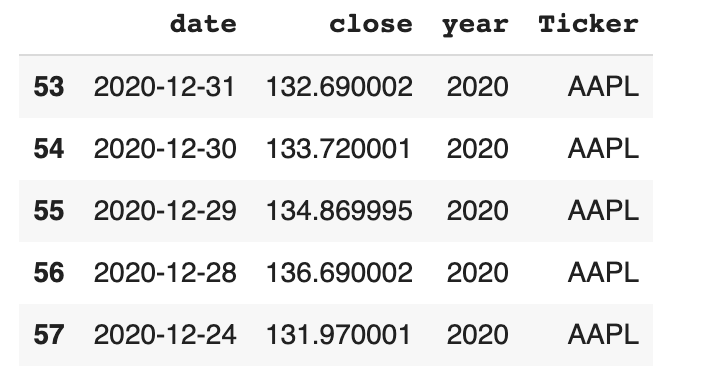

We will then query the API to take the financial ratios. First, we will acquire the EBITDA and EPS using the link highlighted in blue, as seen below.


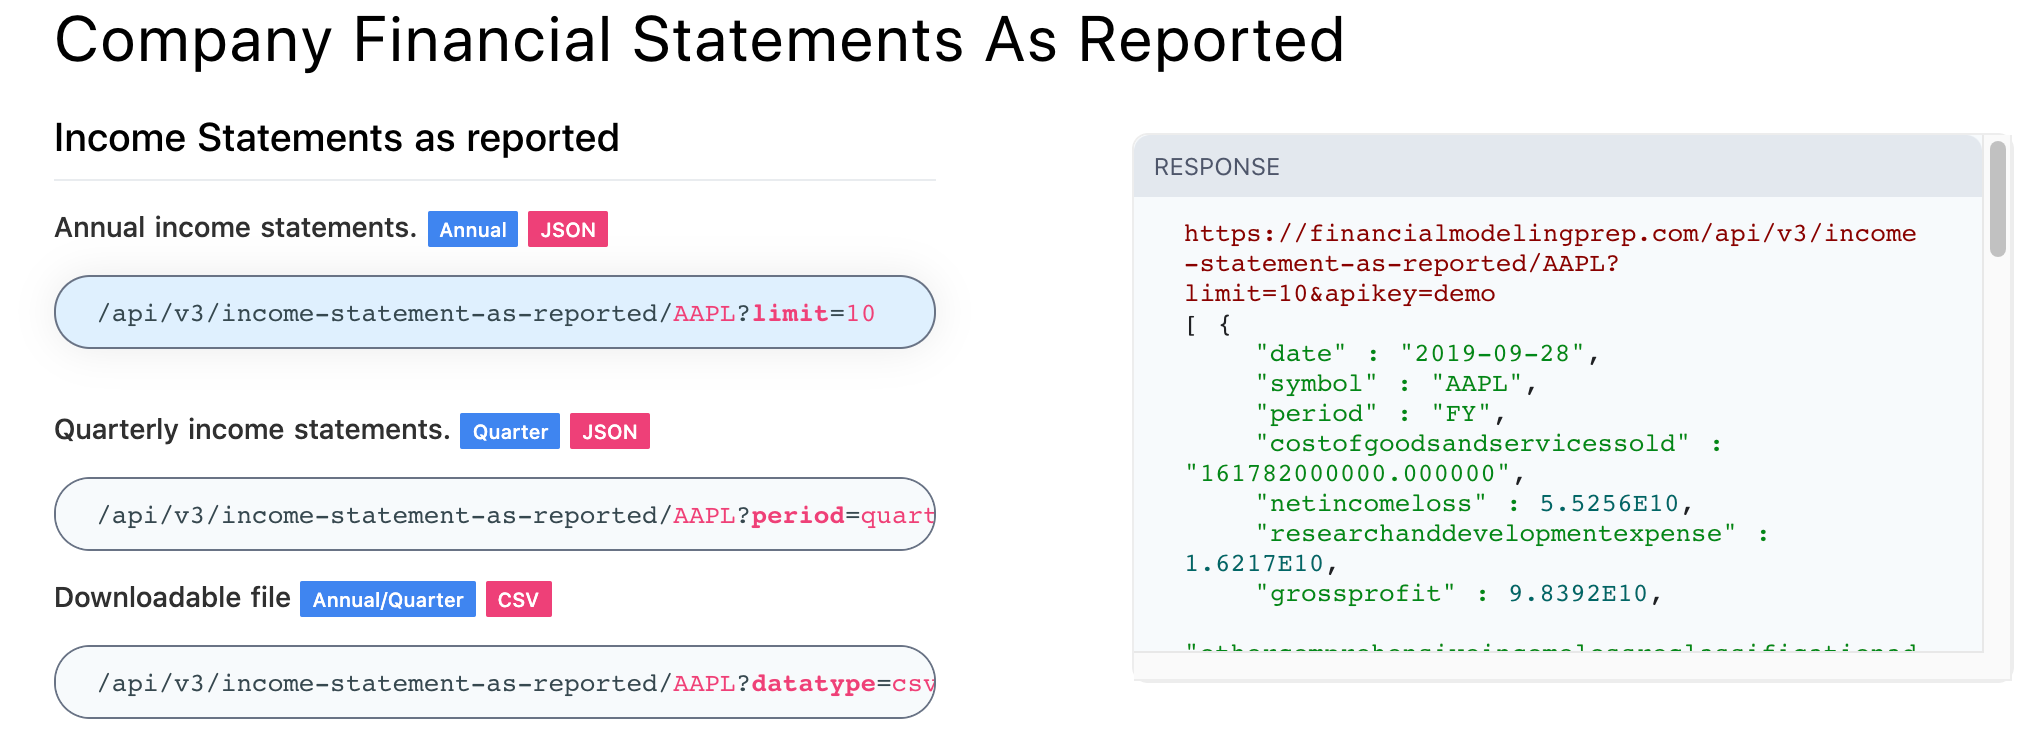

Then we will obtain the 5 other ratios: Current Ratio, Price-Earnings-To-Growth (PEG), Price-Earnings (P/E), Debt-To-Equity (D/E), and Price/Book Value using the link below, highlighted in blue.

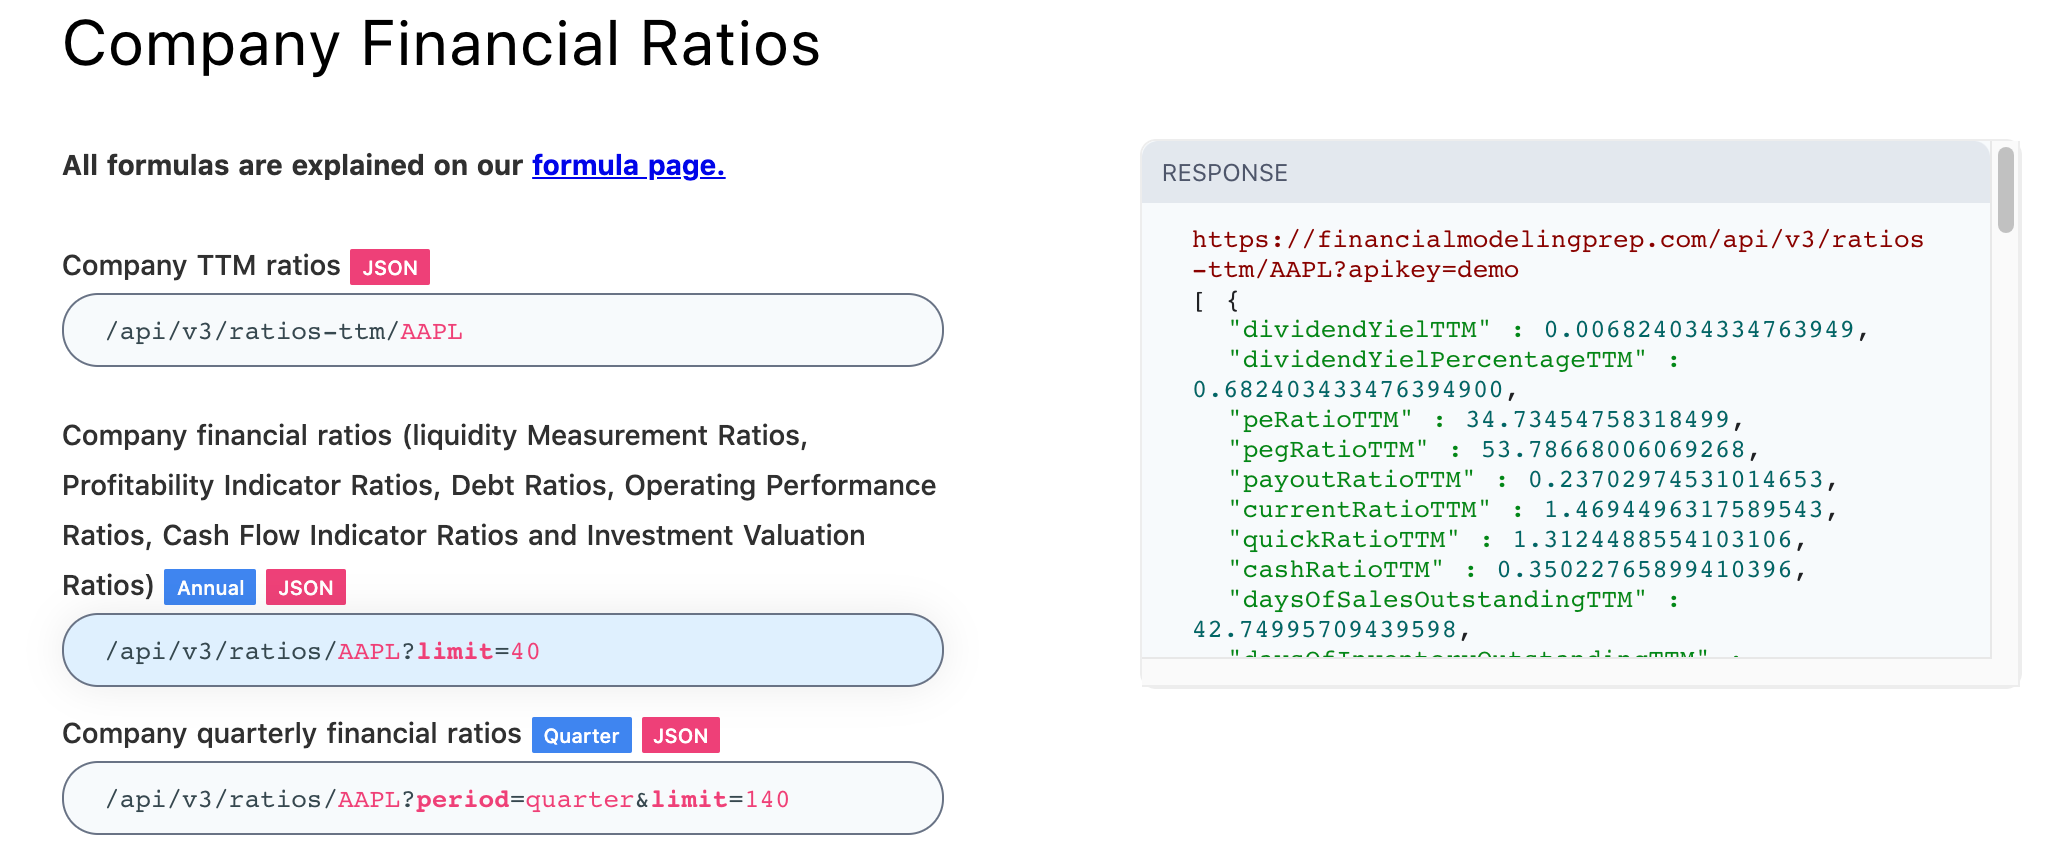


We will then create a dataframe containing the data for all 7 ratios.

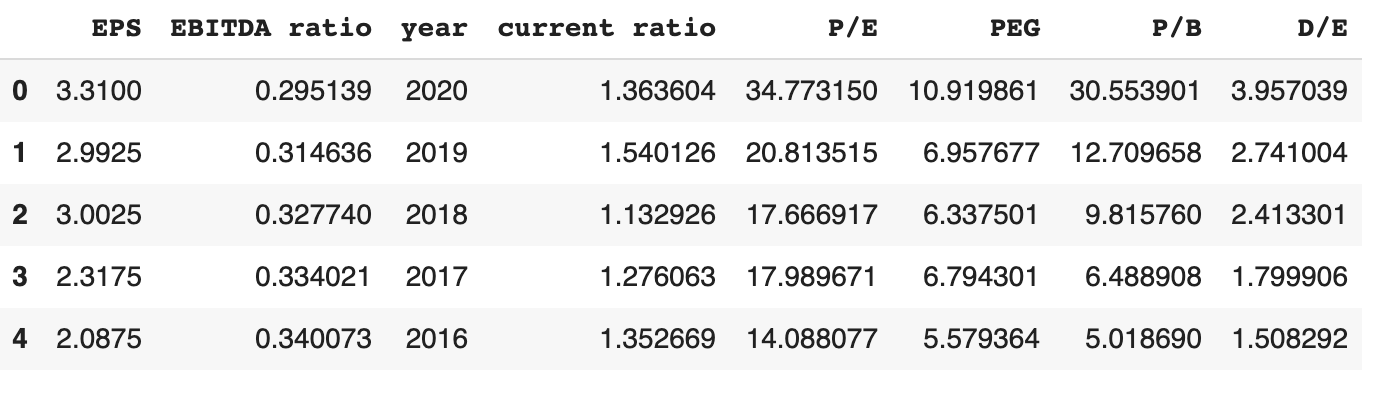

## Pipeline:

We will extract our data with three functions:

- get_year：slicing function for cleaning dates by extracting the year out of a date

- get_historical_prices(ticker, start_year, end_year): get historical price information of a selected company during a selected period of time

- concat_table(*args):concat all the tabnle that we take in

- get_ebidta_eps(ticker, start_year, end_year):  get annual ebidta and eps ratios of a selected company during a selected period of time


- get_other_ratios(ticker, start_year, end_year): get the other 5 ratios, which are current, P/E, PEG, P/B and D/E ratios


## User Inputs / Interaction with Program



In [ ]:
# user inputs for ticker, start year and end year
ticker = str(input('Enter ticker'))
start_year = int(input('Enter start_year'))
end_year = int(input('Enter end_year'))


### Historical Prices Data

#### Price Data Extraction Function

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import json
import plotly.express as px

# API keys 
jacs_api = '5c5790be5ee5a060ca46b6a4a00dcc60' 
JINCHENG_API = '6e9318069b5d25cbb7406f76cc7afdbf'
matt_api = 'b03adad921ca115178f5f87a71b75612'

# slicing function for cleaning dates by extracting the year out of a date
def get_year(str_date):
  '''take a string date and get the year
  Args:
    str_date(str): a date in string format e.g. '2021-03-16'
  
  Returns
    str_year(str): year in the date e.g. '2021'
  '''
  return str_date[:4]

# historical prices 
def get_historical_prices(ticker, start_year, end_year):
  ''' get historical price information of a selected company during a selected 
      period of time
  Args:
    ticker(str): ticker symbol of a company 
    start_year(int): period begining for historical prices
    end_year(int): period ending for historical prices

  Returns:
    price_df(df): dataframe with columns historical prices and dates

  '''
  BASE_url = 'https://financialmodelingprep.com/api/v3/'
  end_point = f'historical-price-full/{ticker}?serietype=line&apikey={jacs_api}'

  # query API (request url)
  response = requests.get(BASE_url + end_point)

  # convert response from json 
  dict_response = response.json()['historical']

  # convert dict to df
  price_df = pd.DataFrame.from_dict(dict_response)

  # select data from the given period
  # map get_year function to get year for each date
  price_df['year'] =  price_df['date'].map(get_year)

  price_df['Ticker'] = ticker

  # select dates that are start_year <= dates <= end_year
  price_df = price_df[(price_df.year >= str(start_year)) & (price_df.year <= str(end_year))]
  

  return price_df

# historical price with open, high, low, close, adjclose, and volumn 
def get_historical_prices_additional(ticker, start_year, end_year):
  '''get historical prices with additional info such as open, high, low, close, adjclose and volumn
   of a selected company during a selected period of time
  Args:
    ticker(str): ticker symbol of a company 
    start_year(int): period begining for historical prices
    end_year(int): period ending for historical prices

  Returns:
    price_df(df): dataframe with columns historical prices, dates, open, high, low, close, adjclose and volumn
  '''
  BASE_url = 'https://financialmodelingprep.com/api/v3/'
  end_point = f'historical-price-full/{ticker}?&apikey={jacs_api}'
  # query API (request url)
  response = requests.get(BASE_url + end_point)

  # convert response from json 
  dict_response = response.json()['historical']
  dict_response 
  additional_price_df = pd.DataFrame.from_dict(dict_response)
  return additional_price_df  


In [ ]:
def concat_table(*args):
  """ to concat all the tabnle that we take in.

  Arg:
    *args:(dataframe): we can take multiple tables 

  returns:
    df_concated(dataframe): a complete dataframe that contains all the info from the takein variable. 

  
  """

  # new list to store the table
  table_list = []

  # iterate through the args, append each to the list
  for item in args:
    table_list.append(item)

  #concat the whole list as a one dataframe
  df_concated = pd.concat(table_list, axis=0)

  return df_concated



#### Price Data Visualization 

In [ ]:
from google.colab import files
# show price df 
price_df = get_historical_prices(ticker, start_year, end_year)
price_df.to_csv('price_df.csv')
files.download('price_df.csv')
price_df.head()

In [ ]:
# show price plot
fig = px.line(price_df, x='date', y='close', template = 'plotly_dark', title=f'Historical Prices for {ticker}')
fig.write_html('price.html')
files.download('price.html')
fig.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# The data for other company, the comparision of different companies' historical stock price. 

#assign the variables
ticker_google = 'GOOG'
ticker_microsoft = 'MSFT'
start_year = 2005
end_year = 2020

# scraping the data
price_df_of_google = get_historical_prices(ticker_google, start_year, end_year)
price_df_of_MSFT = get_historical_prices(ticker_microsoft, start_year, end_year)

# concat different tables in the same dataframe
table_all = concat_table(price_df_of_MSFT,price_df_of_google, price_df)

In [ ]:
# plot the different companies' data on the same figure.  colored them with different colors.
fig = px.line(table_all, x='date', y='close',  title=f'Historical Prices for different companies', template = 'plotly_dark', color="Ticker")
fig.show()
fig.write_html('comapnies_historical_prices_comparison.html')
files.download('comapnies_historical_prices_comparison.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<a id='another_cell'></a>

<a name="ratios"></a>
### Financial Ratios Data According to User Input
- priceBookValueRatio P/B
- EBIDTA
- EPS
- Current Ratio
- priceEarningsToGrowthRatio PEG
- priceEarnings P/E
- debtEquityRatio

These ratios are used to predict stock performance according to this [article](https://www.researchgate.net/publication/258341502_Can_Return_on_equity_be_used_to_predict_portfolio_performance#:~:text=Abstract%20and%20Figures,financial%20ratio%20among%20equity%20investors.&text=Different%20financial%20ratios%2C%20for%20instance,used%20to%20predict%20security%20performance.)

#### Financial Ratio Data Extraction Functions

In [ ]:
# ratios 
def get_ebidta_eps(ticker, start_year, end_year):
  ''' get annual ebidta and eps ratios of a selected company during 
      a selected period of time
  Args:
     ticker(str): ticker symbol of a company 
     start_year(int): period begining for ratios
     end_year(int): period ending for ratios

  Returns:
     ebidta_eps_df(df): dataframe with columns date, EPS and EBITDA ratio
  '''

  BASE_URL = 'https://financialmodelingprep.com/api/v3/'
  ebidta_eps_endpoint = f'income-statement/{ticker}?serietype=line&apikey={jacs_api}'

  # initiate a dictionary to store date, ebidta and eps values
  ebidta_eps_dict = {'date': [], 'EPS': [], 'EBITDA ratio': []}

  # query api
  response = requests.get(BASE_URL + ebidta_eps_endpoint)

  # convert response from json 
  dict_response = response.json()

  # loop through each dictionary in the dict_reponse list 
  # get the ebita and eps keys and store their values
  for i in dict_response:
    for key, value in i.items():
      if key == 'ebitdaratio':
        ebidta_eps_dict['EBITDA ratio'].append(value)
      if key == 'date':
        ebidta_eps_dict['date'].append(value)
      if key == 'eps':
        ebidta_eps_dict['EPS'].append(value)

  # convert dictionary to dataframe
  ebidta_eps_df = pd.DataFrame.from_dict(ebidta_eps_dict)

  # map get_year function to get year for each date
  ebidta_eps_df['year'] =  ebidta_eps_df['date'].map(get_year)
  
  # drop unnecessary date column since these are annual ratios and it makes it easier to merge all annual ratio dfs later
  del ebidta_eps_df['date'] 

  # select dates that are start_year <= dates <= end_year
  ebidta_eps_df = ebidta_eps_df[(ebidta_eps_df.year >= str(start_year)) & (ebidta_eps_df.year <= str(end_year))]

  return ebidta_eps_df

In [ ]:
def get_other_ratios(ticker, start_year, end_year):
  '''get the other 5 ratios, which are current, P/E, PEG, P/B and D/E ratios
  Args:
     ticker(str): ticker symbol of a company 
     start_year(int): period begining for ratios
     end_year(int): period ending for ratios

  Returns:
     ratios_df(df): dataframe with columns date, current ratio, P/E, 
     PEG, P/B and D/E 
  '''
  BASE_URL = 'https://financialmodelingprep.com/api/v3/'
  ratios_endpoint = f'ratios/{ticker}?serietype=line&apikey={jacs_api}'

  # initiate a dictionary to store date, PE, PEG, ROE and current ratio values
  ratios_dict = {'date': [], 'current ratio': [], 'P/E':[], 'PEG': [], 'P/B': [], 'D/E': [] }

  # query api
  response = requests.get(BASE_URL + ratios_endpoint)

  # convert response from json 
  dict_response = response.json()

  # loop through each dictionary in the dict_reponse list 
  # get the 4 ratios and date as keys and store their values
  for i in dict_response:
    for key, value in i.items():
      if key == 'currentRatio':
         ratios_dict['current ratio'].append(value)
      if key == 'date':
        ratios_dict['date'].append(value)
      if key == 'priceBookValueRatio':
        ratios_dict['P/B'].append(value)
      if key == 'priceEarningsToGrowthRatio':
        ratios_dict['PEG'].append(value)
      if key == 'priceEarningsRatio':
        ratios_dict['P/E'].append(value)
      if key == 'debtEquityRatio':
        ratios_dict['D/E'].append(value)

  # convert dictionary to dataframe
  ratios_df = pd.DataFrame.from_dict(ratios_dict)

  # map get_year function to get year for each date
  ratios_df['year'] =  ratios_df['date'].map(get_year)
  
  # drop unnecessary date column since these are annual ratios and it makes it easier to merge all annual ratio dfs later
  del ratios_df['date'] 

  # select dates that are start_year <= dates <= end_year
  ratios_df = ratios_df[(ratios_df.year >= str(start_year)) & (ratios_df.year <= str(end_year))]

  return ratios_df  



#### Financial Ratio Data Visualizations

In [ ]:
# merge all financial ratios together by year
eps_ebidta_df = get_ebidta_eps(ticker, start_year, end_year)
other_ratios_df = get_other_ratios(ticker, start_year, end_year)
ratios_df = eps_ebidta_df.merge(other_ratios_df, on='year')

# display entire ratio df 
display(ratios_df.head())
ratios_df.to_csv('ratios.csv')
files.download('ratios.csv')


,EPS,EBITDA ratio,year,current ratio,P/E,PEG,P/B,D/E
0,3.3100,0.281748,2020,1.363604,34.773150,3.277438,30.553901,3.957039
1,2.9925,0.293946,2019,1.540126,20.813515,-62.492578,12.709658,2.741004
2,3.0025,0.307991,2018,1.123843,17.666917,0.597709,9.815760,2.413301
3,2.3175,0.311913,2017,1.276063,17.989671,1.632758,6.488908,1.799906
4,2.0875,0.327070,2016,1.352669,14.088077,-1.405778,5.018690,1.508292


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Method

The ML tools we focused on for this project are linear regression and LSTM (Recurrent Neural Networks).

1. Linear Regression:

We feed the yearly and daily regression models with a list of features to act as independent variables and we assigned the stock close price as the dependant variable. We then train and test the data. Then we created a model to project the features (variables) and forecast stock prices. 


2. LSTM (RNN):

A LSTM is a long short-term memory model. It is a certain type of recurrent nueral network where you can feed it trainable, time associated data in which it can use to make predictions on.
One major assumption for NNs and in fact many other machine learning models is the independence among data samples. However this assumption does not hold for data which is sequential in nature. Speech, language, time series, video, etc. all exhibit dependence between individual elements across time. NNs treat each data sample individually and thereby lose the benefit that can be derived by exploiting this sequential information. 

In regards to pitfalls, using LSTMs for any type of time series forecasting, the model will face delayed predictions, autocorrelations, stationarity, and misleading accuracy metrics. More specific to predicting stock price, the model can be prone to giving inaccurate predictions due to the wrong accuracy metric when evaluating model performance. In this example, for the sake of illustration, the data was explicitly chosen to represent data that actually cannot be predicted. More specifically, the data I called “stock index”, was actually modeled using a random walk process. As the name indicates, a random walk is a completely stochastic process. Due to this, the idea of using historical data as a training set in order to learn the behavior and predict future outcomes is simply not possible


A brief introduction to LSTMS:
https://machinelearningmastery.com/gentle-introduction-long-short-term-memory-networks-experts/

Specific to stock prediction:
https://www.kdnuggets.com/2018/11/keras-long-short-term-memory-lstm-model-predict-stock-prices.html

https://analyticsindiamag.com/hands-on-guide-to-lstm-recurrent-neural-network-for-stock-market-prediction/




# Results

## Yearly Price Prediction Model

### Description:
This yearly regression model is trained with a selected period of past yearly average price and yearly financial ratios to forecast future prices. The forcast is based on the projection of financial ratios in the following years. 

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.preprocessing import PolynomialFeatures
import plotly.graph_objects as go
import numpy as np

### Create yearly price and ratio dataframe

In [ ]:
# take yearly average price 
yearly_price = pd.DataFrame(price_df.groupby('year').mean()['close'])
# reset index 
yearly_price.reset_index(inplace=True)

# combine yearly average price with yearly ratios
yearly_price_ratio = yearly_price.merge(ratios_df, on='year')

display(yearly_price_ratio.head())
yearly_price_ratio.to_csv('yearly_price_ratio.csv')
files.download('yearly_price_ratio.csv')



,year,close,EPS,EBITDA ratio,current ratio,P/E,PEG,P/B,D/E
0,2005,1.667001,0.058929,0.131290,2.956372,34.390445,0.099406,6.149376,0.547147
1,2006,2.528951,0.084286,0.138649,2.242157,34.127274,0.793109,6.798793,0.723257
2,2007,4.581211,0.144286,0.196867,2.361114,45.774567,0.643026,11.012103,0.744220
3,2008,5.070679,0.195714,0.207765,2.461680,16.794749,0.471192,3.860476,0.881693
4,2009,5.243362,0.228214,0.229685,2.742482,31.700191,1.908976,5.714851,0.501296


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Regression

In [ ]:
x = yearly_price_ratio[['EPS', 'EBITDA ratio', 'current ratio', 'P/E', 'PEG', 'P/B', 'D/E']].values
y = yearly_price_ratio['close'].values

# initialize an empty array same size as y_true
y_pred = np.empty_like(y)

# cross validation
# initiate skfold 
kfold = KFold(n_splits=10)

for train_idx, test_idx in kfold.split(x, y):
    # get training data
    x_train = x[train_idx,:]
    y_true_train = y[train_idx]
    

    # get testing data
    x_test = x[test_idx, :]
    y_true_test = y[test_idx]
    
    # train on training data
    # fit polynomial regression
    reg = LinearRegression(fit_intercept=True)
    reg.fit(x_train, y_true_train)

    # estimate each penguin's species
    y_pred[test_idx] = reg.predict(x_test)

reg.fit(x_train, y_true_train)

# calculate r^2
r2 = r2_score(y_true=y, y_pred=y_pred)
coef = reg.coef_
coeff_df = pd.DataFrame(reg.coef_, yearly_price_ratio[['EPS', 'EBITDA ratio', 'current ratio', 'P/E', 'PEG', 'P/B', 'D/E']].columns, columns=['Coefficient'])
coeff_df.sort_values(by = 'Coefficient',ascending=False, inplace=True)
print('\n Feature coefficients/importance:')
display(coeff_df)


 Feature coefficients/importance:


,Coefficient
EBITDA ratio,12.826126
EPS,10.824190
D/E,5.425112
current ratio,2.347648
P/B,0.897310
PEG,0.002292
P/E,-0.135873


### Ratios projection dataframe

In [ ]:
def ratio_percent_change(yearly_price_ratio, year, change):
  '''take the yearly_price_ratio dataframe, year to project until and indicated percent change in
  each of the ratios. Outputs a new dataframe with projected data
  Args:
    yearly_price_ratio(df): original dataframe
    year(int): year to project until
    change(list): percentage changes in the ratios
  Returns:
    projection(int): new dataframe with projected data
  '''
  # locate last year and ratios in the original df 
  year_ = int(yearly_price_ratio.iloc[-1,:]['year'])
  EPS = float(yearly_price_ratio.iloc[-1,:]['EPS'])
  EBITDA = float(yearly_price_ratio.iloc[-1,:]['EBITDA ratio'])
  current = float(yearly_price_ratio.iloc[-1,:]['current ratio'])
  PE = float(yearly_price_ratio.iloc[-1,:]['P/E'])
  PEG = float(yearly_price_ratio.iloc[-1,:]['PEG'])
  PB = float(yearly_price_ratio.iloc[-1,:]['P/B'])
  DE = float(yearly_price_ratio.iloc[-1,:]['D/E'])

  # create empty dict to store prediction values
  dic = dict()

  # create empty lists to store prediction values for each feature
  year_list = []
  EPS_list = []
  EBITDA_list = []
  current_list = []
  PE_list = []
  PEG_list = []
  PB_list = []
  DE_list = []

  while year_ < year:
    year_ += 1
    year_list.append(year_)

    EPS *= (1 + change[0])
    EPS_list.append(EPS)

    EBITDA *= (1 + change[1])
    EBITDA_list.append(EBITDA)

    current *= (1 + change[2])
    current_list.append(current)

    PE *= (1 + change[3])
    PE_list.append(PE)

    PEG *= (1 + change[4])
    PEG_list.append(PEG)

    PB *= (1 + change[5])
    PB_list.append(PB)

    DE *= (1 + change[6])
    DE_list.append(DE)

  # store values in dict
  dic['year'] = year_list
  dic ['EPS'] = EPS_list
  dic ['EBITDA ratio'] = EBITDA_list
  dic ['current ratio'] = current_list
  dic ['P/E'] = PE_list
  dic ['PEG'] = PEG_list
  dic ['P/B'] = PB_list
  dic ['D/E'] = DE_list
    

  # convert dict to df
  projected_yearly_ratios = pd.DataFrame.from_dict(dic)

  return projected_yearly_ratios

In [ ]:
# takes users' inputs for ratios percentage change and outputs projection
change = []
year = int(input('Enter the year to project until, e.g.2030\n'))
EPS = float(input('Enter the percentage change in EPS\n'))
EBITDA = float(input('Enter the percentage change in EBITDA\n'))
current = float(input('Enter the percentage change in current ratio\n'))
PE = float(input('Enter the percentage change in PE\n'))
PEG = float(input('Enter the percentage change in PEG\n'))
PB = float(input('Enter the percentage change in PB\n'))
DE = float(input('Enter the percentage change in DE\n'))
change.extend([EPS, EBITDA, current, PE, PEG, PB, DE])
projected_yearly_ratios = ratio_percent_change(yearly_price_ratio, year, change)
display(projected_yearly_ratios)
projected_yearly_ratios.to_csv('projected_yearly_ratios.csv')
files.download('projected_yearly_ratios.csv')


Enter the year to project until, e.g.2030
2030
Enter the percentage change in EPS
0.15
Enter the percentage change in EBITDA
-0.15
Enter the percentage change in current ratio
0
Enter the percentage change in PE
0.28
Enter the percentage change in PEG
-0.078
Enter the percentage change in PB
0
Enter the percentage change in DE
0.09


,year,EPS,EBITDA ratio,current ratio,P/E,PEG,P/B,D/E
0,2021,3.806500,0.239486,1.363604,44.509633,3.021798,30.553901,4.313173
1,2022,4.377475,0.203563,1.363604,56.972330,2.786098,30.553901,4.701359
2,2023,5.034096,0.173028,1.363604,72.924582,2.568782,30.553901,5.124481
3,2024,5.789211,0.147074,1.363604,93.343465,2.368417,30.553901,5.585684
4,2025,6.657592,0.125013,1.363604,119.479635,2.183680,30.553901,6.088396
5,2026,7.656231,0.106261,1.363604,152.933933,2.013353,30.553901,6.636351
6,2027,8.804666,0.090322,1.363604,195.755435,1.856312,30.553901,7.233623
7,2028,10.125366,0.076774,1.363604,250.566956,1.711519,30.553901,7.884649
8,2029,11.644171,0.065258,1.363604,320.725704,1.578021,30.553901,8.594267
9,2030,13.390796,0.055469,1.363604,410.528901,1.454935,30.553901,9.367751


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Calculate predicted price according to ratio features

In [ ]:
# predict'y'using projected ratios
x_project = projected_yearly_ratios[['EPS', 'EBITDA ratio', 'current ratio', 'P/E', 'PEG', 'P/B', 'D/E']].values
projected_yearly_ratios['close'] = reg.predict(x_project)

In [ ]:
# plot 
fig = go.Figure(layout=go.Layout(annotations=[go.layout.Annotation(text=f'For constant ratios percent change<br>per year:<br><br>EPS:{change[0]}<br>EBITDA:{change[1]}<br>current ratio:{change[2]}<br>P/E:{change[3]}<br>PEG:{change[4]}<br>P/B:{change[5]}<br>D/E:{change[6]}',align='left',showarrow=False,xref='paper',yref='paper',x=1.15,y=0.3,bordercolor='black',borderwidth=1)]))
fig.add_trace(go.Scatter(x=yearly_price_ratio['year'], y=yearly_price_ratio['close'],  mode='lines', name='Historical Prices'))
fig.add_trace(go.Scatter(x=projected_yearly_ratios['year'], y=projected_yearly_ratios['close'],  mode='lines', name='Predicted Prices'))
fig.update_layout(title=f'Historical and Projected Prices for {ticker}',template='plotly_dark' , xaxis_title='year',yaxis_title='price')
fig.show()
fig.write_html('yearly_price_prediction.html')
files.download('yearly_price_prediction.html')
print(f'r^2 = {r2}')
print(f'price = {coef[0]: 0.2f}*EPS + {coef[1]: 0.2f}*EBITDA + {coef[2]: 0.2f}*current + {coef[3]: 0.2f}*P/E + {coef[4]: 0.2f}*PEG + {coef[5]: 0.2f}*P/B + {coef[6]: 0.2f}*D/E')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

r^2 = -0.4835718205412618
price =  10.82*EPS +  12.83*EBITDA +  2.35*current + -0.14*P/E +  0.00*PEG +  0.90*P/B +  5.43*D/E


### Evaluate accuracy - compare predicted past prices with actual past prices

In [ ]:
## create test dfs
test_price_df = get_historical_prices('AAPL', 2000, 2010)
ratio_p1 = get_ebidta_eps('AAPL', 2000, 2010)
ratio_p2 = get_other_ratios('AAPL', 2000, 2010)
test_ratio_df = ratio_p1.merge(ratio_p2, on='year')

# perform same steps as for the yearly price model
# take yearly average price 
test_yearly_price = pd.DataFrame(test_price_df.groupby('year').mean()['close'])
# reset index 
test_yearly_price.reset_index(inplace=True)

# combine yearly average price with yearly ratios
test_yearly_price_ratio = test_yearly_price.merge(test_ratio_df, on='year')


# regression
x = test_yearly_price_ratio[['EPS', 'EBITDA ratio', 'current ratio', 'P/E', 'PEG', 'P/B', 'D/E']].values
y = test_yearly_price_ratio['close'].values

# initialize an empty array same size as y_true
y_pred = np.empty_like(y)

# cross validation
# initiate skfold 
kfold = KFold(n_splits=10)

for train_idx, test_idx in kfold.split(x, y):
    # get training data
    x_train = x[train_idx,:]
    y_true_train = y[train_idx]
    

    # get testing data
    x_test = x[test_idx, :]
    y_true_test = y[test_idx]
    
    # train on training data
    # fit polynomial regression
    reg = LinearRegression(fit_intercept=True)
    reg.fit(x_train, y_true_train)

    # estimate each penguin's species
    y_pred[test_idx] = reg.predict(x_test)

reg.fit(x_train, y_true_train)

# calculate r^2
r2 = r2_score(y_true=y, y_pred=y_pred)
coef = reg.coef_
print(f'r2 = {r2}')
print(f'price = {coef[0]: 0.2f}*EPS + {coef[1]: 0.2f}*EBITDA + {coef[2]: 0.2f}*current + {coef[3]: 0.2f}*P/E + {coef[4]: 0.2f}*PEG + {coef[5]: 0.2f}*P/B + {coef[6]: 0.2f}*D/E')


change = [0.15, -0.15, 0.2, 0.05, 0, -0.078, 0.28]
# project future yearly_ratios: 2010-2020
projected_yearly_ratios = ratio_percent_change(test_yearly_price_ratio, 2020, change)

# predict'y'using projected ratios
x_project = projected_yearly_ratios[['EPS', 'EBITDA ratio', 'current ratio', 'P/E', 'PEG', 'P/B', 'D/E']].values
projected_yearly_ratios['close'] = reg.predict(x_project)

# plot 
fig = go.Figure(layout=go.Layout(annotations=[go.layout.Annotation(text=f'For constant ratios percent change<br>per year:<br><br>EPS:{change[0]}<br>EBITDA:{change[1]}<br>current ratio:{change[2]}<br>P/E:{change[3]}<br>PEG:{change[4]}<br>P/B:{change[5]}<br>D/E:{change[6]}',align='left',showarrow=False,xref='paper',yref='paper',x=1.15,y=0.05,bordercolor='black',borderwidth=1)]))
fig.add_trace(go.Scatter(x=yearly_price_ratio['year'], y=yearly_price_ratio['close'],  mode='lines', name='Historical Prices'))
fig.add_trace(go.Scatter(x=projected_yearly_ratios['year'], y=projected_yearly_ratios['close'],  mode='lines', name='Predicted Prices'))
fig.update_layout(title=f'Historical and Projected Prices for {ticker}',template='plotly_dark' , xaxis_title='year',yaxis_title='price')
fig.show()
fig.write_html('yearly_model_accuracy.html')
files.download('yearly_model_accuracy.html')


r2 = -3.8914234879698055
price =  29.36*EPS + -10.43*EBITDA +  0.38*current +  0.00*P/E + -0.01*PEG +  0.18*P/B +  2.51*D/E


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Daily Price Prediction Model

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, r2_score
from sklearn.preprocessing import PolynomialFeatures

### Description 
Our daily regression model is using the price of one day before, and the price of two day before as the features to predict the stock adjclose price. 

In [ ]:
# create dataframes 
date = price_df[['date']]

# get the adjclose price as a dataframe, and the oneday before, two day before
normal_order_close = price_df[['close']]
oneday_before_close = normal_order_close[1:]
two_day_before = normal_order_close[2:]



# reset the index and drop the previous index column
oneday_before_close.reset_index(inplace = True)
del oneday_before_close["index"]

two_day_before.reset_index(inplace = True)
del two_day_before["index"]

normal_order_close.reset_index(inplace = True)
del normal_order_close["index"]



# cut the redundent one, to make these four dataframe the same length
normal_order_close.drop(index = [4026,4025], inplace = True)
oneday_before_close.drop(index = [4025], inplace = True)
date.reset_index(inplace = True)
del date['index']
date.drop(index = [4026,4025], inplace = True)



# concat the table and reset the columns name
newtable = pd.concat([date, normal_order_close,oneday_before_close,two_day_before], axis = 1)
newtable.columns = ["date","close price","oneday before","two day before"]


# draw the new table and save that to teh csv.
display(newtable)
newtable.to_csv('daily_prices_df.csv')
files.download('daily_prices_df.csv')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,date,close price,oneday before,two day before
0,2020-12-31,132.690002,133.720001,134.869995
1,2020-12-30,133.720001,134.869995,136.690002
2,2020-12-29,134.869995,136.690002,131.970001
3,2020-12-28,136.690002,131.970001,130.960007
4,2020-12-24,131.970001,130.960007,131.880005
...,...,...,...,...
4020,2005-01-11,1.152857,1.231429,1.236607
4021,2005-01-10,1.231429,1.236607,1.152679
4022,2005-01-07,1.236607,1.152679,1.151786
4023,2005-01-06,1.152679,1.151786,1.141786


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Regression

In [ ]:
reg = LinearRegression()

x_feat_list = ['oneday before','two day before']

y_feat_list = ['close price']
# get target variable
x = newtable.loc[:, x_feat_list].values
y = newtable.loc[:, y_feat_list].values
    
# fit regression
reg.fit(x, y)

y_pred = reg.predict(x)

# add prediction to df 
newpd = pd.DataFrame(y_pred)
prediciton_table = pd.concat([normal_order_close, newpd, date], axis = 1)
prediciton_table.columns = ["original price", "prediciton", "date"]

# show new df 
display(prediciton_table)
prediciton_table.to_csv('daily_prices_prediction_df.csv')
files.download('daily_prices_prediction_df.csv')


,original price,prediciton,date
0,132.690002,134.151041,2020-12-31
1,133.720001,135.393124,2020-12-30
2,134.869995,136.342914,2020-12-29
3,136.690002,132.108467,2020-12-28
4,131.970001,131.354240,2020-12-24
...,...,...,...
4020,1.152857,1.218375,2005-01-11
4021,1.231429,1.211654,2005-01-10
4022,1.236607,1.138641,2005-01-07
4023,1.152679,1.136529,2005-01-06


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# calculate r^2 using cross validation
y_pred = np.empty_like(y)

kfold = KFold(n_splits=10)
for train_idx, test_idx in kfold.split(x, y):
    # split data
    x_lin_test = x[test_idx, :]
    x_lin_train = x[train_idx, :]
    y_train = y[train_idx]

    # fit
    reg.fit(x_lin_train, y_train)

    # predict
    y_pred[test_idx] = reg.predict(x_lin_test)

# validated r2
r2_lin_cross_2 = r2_score(y_true=y, y_pred=y_pred)


r^2 = 0.9990266071648701


In [ ]:
# regression model equation
Intercept=reg.intercept_
Coefficients=reg.coef_
# hence, the function would be like:
print(f'Price = {Coefficients[0][0]} * oneDayBefore + {Coefficients[0][1]} * twoDayBefore')

Price = 0.8685250953197401 * oneDayBefore + 0.1336718059733465 * twoDayBefore


In [ ]:
def getnewprice(x1, x2):
  '''
  This function is used to calculate the new price by using the model funciton from our model two(regression model daily)

  Args:
  x1(inte) : price from one day before
  x2(integer): price from two day prior

  Returns:
  y(integer): future one day price. 
  
  '''
    y = Coefficients[0][0]*x1 + Coefficients[0][1]*x2
    return y

In [ ]:
def getFutureData(nDays):
  '''
  getFunctionData take in how many days the user want to predict the price in the future, return the dataframe of the future prices.

  Args:
  nDays:(int): how many days

  Returns:
  new_prediction_table:(dataframe): the dataframe that contains all of hte future predicted prices, as well as the future date, timestamp
  
  '''
  i = 0


  # create the list, 
  # since we are using hte last two days in 2020 to predict our future price, add the last two days data into the list
  date_list = []
  newprice_byPrediction = []
  first_data = y[0][0]
  second_data = y[1][0]

  
  newprice_byPrediction.append(first_data)
  newprice_byPrediction.append(second_data)


  #set the date start time at 2020/1/1, keep adding one, and the timestamp will fiture out when to move to the next month. 
  new_pred = datetime(2021,1,1)


  # while loop, while the days is smaller than the user setted one, keep predicting. 
  while(i < nDays):
    date_list.insert(0,new_pred)
    odb = newprice_byPrediction[0]
    tdb = newprice_byPrediction[1]
    
    newp = getnewprice(odb,tdb)
    
    # keep inserting the new result at the first items in the list. 
    newprice_byPrediction.insert(0,newp)
    new_pred += timedelta(days=1)
    
    i = i+1


  # create thea tables and concat them, reset the columns names
  datetable = pd.DataFrame(date_list)
  futuredatatable  = pd.DataFrame(newprice_byPrediction)
  new_prediction_table  = pd.concat([datetable,futuredatatable], axis=1)
  new_prediction_table.columns = ["date", "predicition"]
  return new_prediction_table




In [ ]:
future = getFutureData(365)
future.head()

,date,predicition
0,2021-12-31,269.334322
1,2021-12-30,268.813280
2,2021-12-29,268.293245
3,2021-12-28,267.774217
4,2021-12-27,267.256193


### Model Prediction results

In [ ]:
import plotly.graph_objects as go
from datetime import date, time, datetime, timedelta


# use the go.scatter to plot the results,
fig = go.Figure()


# assign the values
prediction = prediciton_table["prediciton"]
date = prediciton_table["date"]
original = prediciton_table["original price"]

fig.add_trace(go.Scatter(x=date, y=prediction,  mode='lines', name='Historical Prices'))
fig.add_trace(go.Scatter(x=date, y=original,  mode='lines', name='Predicted Prices'))

fig.add_trace(go.Scatter(x=future["date"], y=future["predicition"],  mode='lines', name='future prediciton Prices'))


# set the titles 
fig.update_layout(title=f'Historical and Projected Prices for {ticker}',template='plotly_dark' , xaxis_title='year',yaxis_title='price')
fig.show()
fig.write_html('daily_price_prediction.html')

# save the result plot
files.download('daily_price_prediction.html')
print(f'r^2 = {r2_lin_cross_2}')


## Daily Price LSTM

### Description

Instead of using linear regression, we researched other ML tools for prediction and found LSTM. 


A LSTM is a long short-term memory model. It is a certain type of recurrent nueral network where you can feed it trainable, time associated data in which it can use to make predictions on.

In [ ]:
price_df = get_historical_prices('AAPL', 2005, 2021)
price_df.head()

,date,close,year,Ticker
0,2021-04-20,133.110000,2021,AAPL
1,2021-04-19,134.840000,2021,AAPL
2,2021-04-16,134.160000,2021,AAPL
3,2021-04-15,134.500000,2021,AAPL
4,2021-04-14,132.029999,2021,AAPL


In [ ]:
# plot
px.line(price_df, x='date', y='close', template = 'plotly_dark', title=f'Historical Prices for {ticker}')

### Initializing and Training an LSTM RNN

In this model, we split the daily price data into a training set and testing set. For the training set, we cut it off 30 days before the last entry, and made my testing set from those next 30 data points. We then trained the model by giving it the last 90 days of daily closing prices to predict the next day’s price for each data point in the training set. Next, we tested my model on those last 30 days and used the correct closing prices on those days as a validation set.

In [ ]:
#importing required libraries
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.metrics import r2_score
import numpy as np
from sklearn.metrics import r2_score

In [ ]:
# only getting the date and close columns from the historical price dataframe
data = price_df[['date', 'close']].copy()
# reverse the order of the rows to make the most recent data last
new_data = data.iloc[::-1]

# setting index to the date column
new_data.set_index('date', inplace=True, drop=True)

# creating train validation sets
# Last quarter = last 90 days
# train on data up to last quarter (len of dataset - 90)
dataset = new_data.values
train_idx = len(price_df) - 90
train = dataset[0:train_idx]
valid = dataset[train_idx:]

# Using MinMaxScaler to normalize input price data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset.reshape(-1, 1))

# converting scaled dataset into x_train and y_train
x_train, y_train = [], []
for i in range(90,len(train)):
    x_train.append(scaled_data[i-90:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 30 values, using past 90 from the train data
inputs = new_data[len(new_data) - len(valid) - 90:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(90,inputs.shape[0]):
    X_test.append(inputs[i-90:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

3847/3847 - 24s - loss: 4.8103e-04


calculate r^2 and rms


In [ ]:
# Getting r^2 score from model 
r2 = r2_score(y_true=valid, y_pred=closing_price)
r2

In [ ]:
# Getting root mean square from data
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

13.116770420812351

### Plotting the predicted closing price vs the actual validation set

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

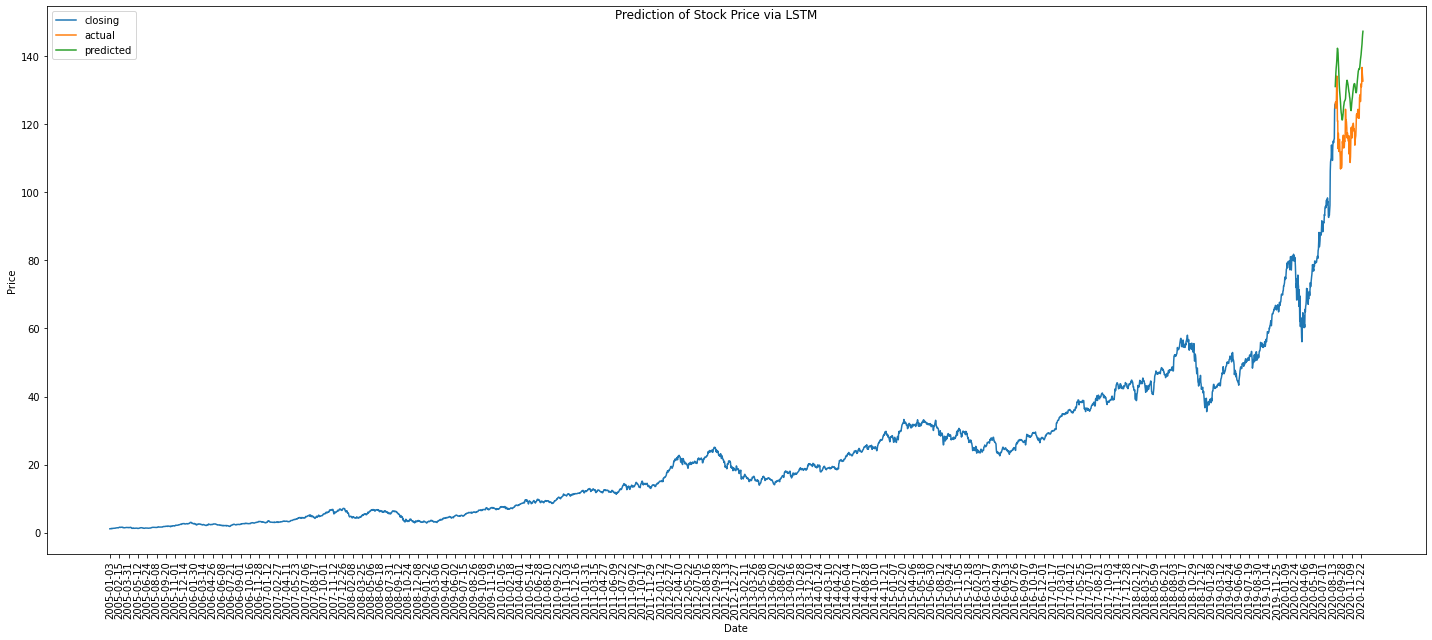

In [ ]:
# Plotting predicted vs actual in last month's prices

train = new_data[:train_idx]
valid = new_data[train_idx:]
valid['Predictions'] = closing_price

# plot training data + validation data
plt.plot(train['close'], label='closing')
plt.plot(valid[['close']], label='actual')
plt.plot(valid[['Predictions']], label='predicted')
plt.ylabel('Price')
plt.xlabel('Date')
plt.legend()
plt.suptitle('Prediction of Stock Price via LSTM')
pos = np.arange(len(price_df['date'].iloc[::-1])) 
plt.xticks(pos[::30], price_df['date'].iloc[::-1].values[::30], rotation=90)
plt.gcf().set_size_inches(20, 9)
plt.tight_layout()

plt.savefig('test_daily_LSTM.png')
files.download('test_daily_LSTM.png') 

### Model Prediction Results

Predicting the next n = 30 (May) closing prices via LSTM Model

Finally, we used the LSTM model to predict the next month’s (30 days) closing prices by feeding the model the most recent 90 days closing prices. 

In [ ]:
# Only getting the closing prices from the historical price dataframe
close_data = price_df['close'].iloc[::-1].values
close_data = close_data.reshape((-1))


def predict(num_prediction, model):
  '''
  Uses the given model to make a certain number of predictions given closing price data

  Inputs:
    num_prediction (int): number of predictions to make
    model (Sequential): a ML model, in this case an LSTM
  Returns:
    The predicted values a certain number of days (look_back) back
  '''

    prediction_list = close_data[-look_back:]
  
    for n in range(0, num_prediction):
        x = prediction_list[n]
        #x = prediction_list[-look_back+n:]
        x = x.reshape((1, 1, 1))
        out = model.predict(x)
        prediction_list = np.append(prediction_list, out)
           
    return prediction_list[:look_back]
    
def predict_dates(num_prediction):
  '''
  Depending on the number of predictions for the model to make, get the dates needed

  Inputs:
    num_prediction (int): number of predictions to make
  Returns:
    predicted_dates (pd.Dataframe): dates of closing prices predicting
  '''
    last_date = price_df['date'].iloc[::-1].values[-1]
    prediction_dates = pd.date_range(last_date, periods=num_prediction+1).tolist()
    return prediction_dates

# Predicting 30 days into the future, looking back at past 90 days (3mos)
num_prediction = 30
look_back = 90
forecast = predict(num_prediction, model)
forecast_dates = predict_dates(num_prediction)

In [ ]:
# Plotting the predicted closing price values for the next month

import plotly.graph_objects as go

trace1 = go.Scatter(
    x = data['date'].iloc[::-1].iloc[3000:].values.tolist(),
    y = close_data[3000:],
    mode = 'lines',
    name = 'Data'
)
trace2 = go.Scatter(
    x = forecast_dates,
    y = forecast,
    mode = 'lines',
    name = 'Prediction'
)
layout = go.Layout(
    title = "AAPL Stock",
    xaxis = {'title' : "Date"},
    yaxis = {'title' : "Close"},
    template = 'plotly_dark'
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()
fig.write_html('daily_price_prediction_LSTM.html')
files.download('daily_price_prediction_LSTM.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Discussion
After some reflection, there are a few subjects of discussion that come to mind. First, we see how significant the r2 score for the daily linear regression model is. In fact, its such a high value (0.99) that its quite concerning and we have to question why we got this as a result. This value suggests the predictive regression model fits almost 100% of the data observed; a (very) strong case of overfitting. By re-analyzing our data, we can see that there are marginal changes in close price for our particular ticker (AAPL) over the course of the 2 prior days we observe. Since this is the case, it makes sense that the model would fit the data so well. 

In regards to the goal of our project and our final results, by comparing the yearly regression model to the daily RNN model, we see the daily RNN model has a much greater r2 score (0.70) than the yearly regression model (-0.48). While the daily linear regression model isn't viable based on the data we gathered, a yearly regression model has a more plausible result. This result, however, is not ideal, as it is a negative value. This tells us that for this specific ticker, choosing yearly financial ratios -- or at least the ones we chose -- aren't useful features for our regression model. However, implementing a recurrent neural network in our daily model has given us some hope. The r2 score certainly seems plausible. And equally important: it's a significantly positive value. We can conclude that the daily RNN model comes out as our best model. 


# Takeaways
The takeaway here is more of a lesson about linear regression, r2 scores and ML tools in general: always question your results, especially when things seem too good to be true. Its important to understand the data and oversee the entire process to verify your results.

If we were to continue our analysis for an ideal predictive model, we would explore other time frequencies such as quarterly or monthly data, and we might test other ML tools. The next step would be to test a yearly RNN model and compare it to our daily RNN model to get a better sense of which tool works best for our project.